In [1]:
from pathlib import Path
import pickle

import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format = "retina"

In [33]:
methods = {
    'sgd-rb-1': ('ogd', "olive", "dashdot"),
    'sgd-rb-10': ('r-sgd-10', plt.cm.Greens(0.9), "dashdot"),
    
    'adam-rb-1': ('r-adam-1', plt.cm.Reds(0.5), "--"),
    'adam-rb-10': ('r-adam-10', plt.cm.Reds(0.9), "--"),
    
    'fdekf': ('fdekf', 'black', "dotted"),
    'vdekf': ('vdekf', 'dimgray', "dotted"),
    
    'lofi-1': ('lofi-01', plt.cm.Blues(0.5), "-"),
    'lofi-10': ('lofi-10', plt.cm.Blues(0.9), "-"),
}

n_iter = 20

# Stationary CIFAR-10

In [ ]:
# Set environmental va/run_regression_experiments.pyriables
%env REBAYES_OUTPUT=./stationary/cifar10/mlp/nll
%env REBAYES_CONFIG=../configs/

# Run the script
# To tune the hyperparameters:
%run run_classification_experiments.py --dataset cifar10 \
    --hyperparameters tune_and_eval --n_explore 10 --n_exploit 15

In [17]:
path_cifar10_mlp = Path(Path.cwd(), "stationary", "cifar10", "mlp", "nll")

agents_cifar10_mlp = (
    *[f"sgd-rb-{rank}" for rank in [1, 10,]],
    *[f"adam-rb-{rank}" for rank in [10,]],
    "fdekf", "vdekf",
    *[f"lofi-{rank}" for rank in [1, 10,]],
)

results_miscl_cifar10_mlp, results_nll_cifar10_mlp = {}, {}

for method in agents_cifar10_mlp:
    with open(Path(path_cifar10_mlp, f'{method}.pkl'), "rb") as f:
        curr_result = pickle.load(f)
    results_miscl_cifar10_mlp[method] = {
        "mean": jnp.mean(curr_result["miscl"], axis=0),
        "std": jnp.std(curr_result["miscl"], axis=0),
    }
    results_nll_cifar10_mlp[method] = {
        "mean": jnp.mean(curr_result["nll"], axis=0),
        "std": jnp.std(curr_result["nll"], axis=0),
    }

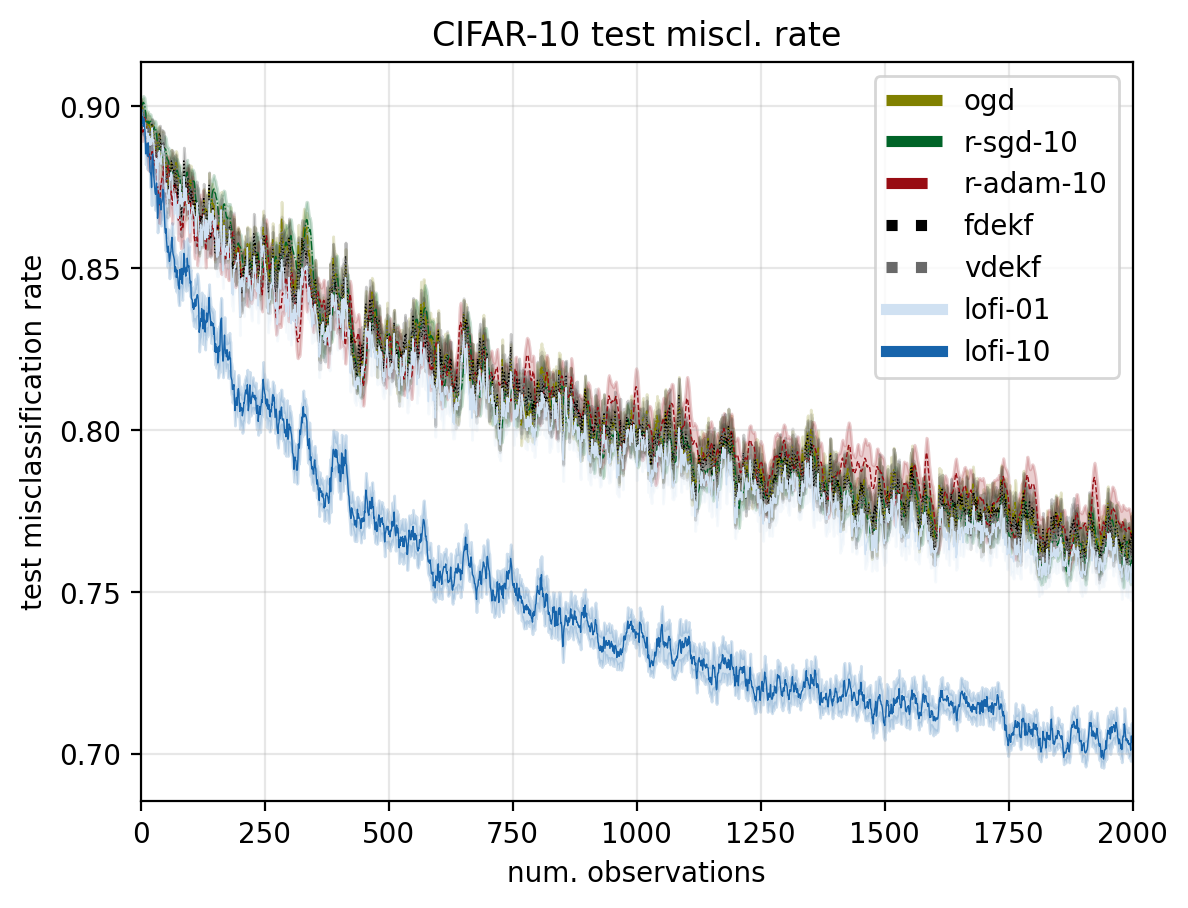

In [18]:
# Misclassification rate
fig, ax = plt.subplots()
for key, val in results_miscl_cifar10_mlp.items():
    mean, std = val['mean'], val['std']
    label, color, ls = methods[key]
    ax.plot(mean, label=label, c=color, linewidth=0.5, linestyle=ls)
    ax.fill_between(
        jnp.arange(mean.shape[0]),
        mean - std / jnp.sqrt(n_iter),
        mean + std / jnp.sqrt(n_iter),
        alpha=0.2,
        color=color
    )
ax.set_xlabel('num. observations')
ax.set_ylabel('test misclassification rate')
ax.set_xlim(0, 2000)
# ax.set_ylim(0.2, 0.6)
ax.grid(alpha=0.3)
ax.set_title('CIFAR-10 test miscl. rate')
leg = ax.legend()
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4.0)

fig.savefig(Path(path_cifar10_mlp, 'cifar10-mlp-clf-test-miscl.pdf'), bbox_inches='tight')

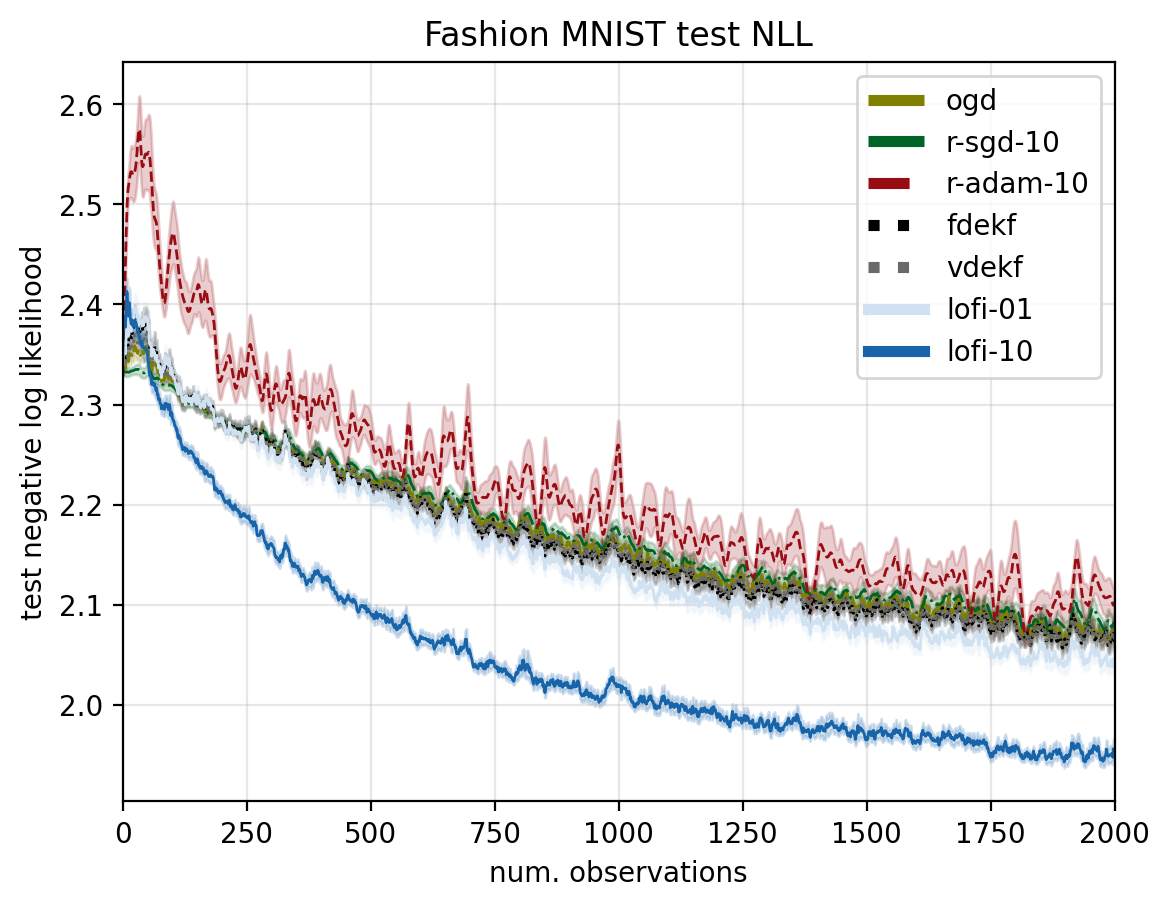

In [21]:
# Negative log-likelihood
fig, ax = plt.subplots()
for key, val in results_nll_cifar10_mlp.items():
    mean, std = val['mean'], val['std']
    label, color, ls = methods[key]
    ax.plot(mean, label=label, c=color, linewidth=1.0, linestyle=ls)
    ax.fill_between(
        jnp.arange(mean.shape[0]),
        mean - std / jnp.sqrt(n_iter),
        mean + std / jnp.sqrt(n_iter),
        alpha=0.2,
        color=color
    )
ax.set_xlabel('num. observations')
ax.set_ylabel('test negative log likelihood')
ax.set_xlim(0, 2000)
ax.grid(alpha=0.3)
ax.set_title('Fashion MNIST test NLL')
leg = ax.legend()
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4.0)

fig.savefig(Path(path_cifar10_mlp, 'fmnist-mlp-clf-test-nll.pdf'), bbox_inches='tight')

In [23]:
path_cifar10_mlp = Path(Path.cwd(), "stationary", "cifar10", "mlp", "nll")

lofi_cifar10_mlp = (
    *[f"lofi-{rank}" for rank in [1, 2, 5, 10, 20,]],
)

lofi_miscl_cifar10_mlp, lofi_nll_cifar10_mlp = {}, {}

for method in lofi_cifar10_mlp:
    with open(Path(path_cifar10_mlp, f'{method}.pkl'), "rb") as f:
        curr_result = pickle.load(f)
    lofi_miscl_cifar10_mlp[method] = {
        "mean": jnp.mean(curr_result["miscl"], axis=0),
        "std": jnp.std(curr_result["miscl"], axis=0),
    }
    lofi_nll_cifar10_mlp[method] = {
        "mean": jnp.mean(curr_result["nll"], axis=0),
        "std": jnp.std(curr_result["nll"], axis=0),
    }

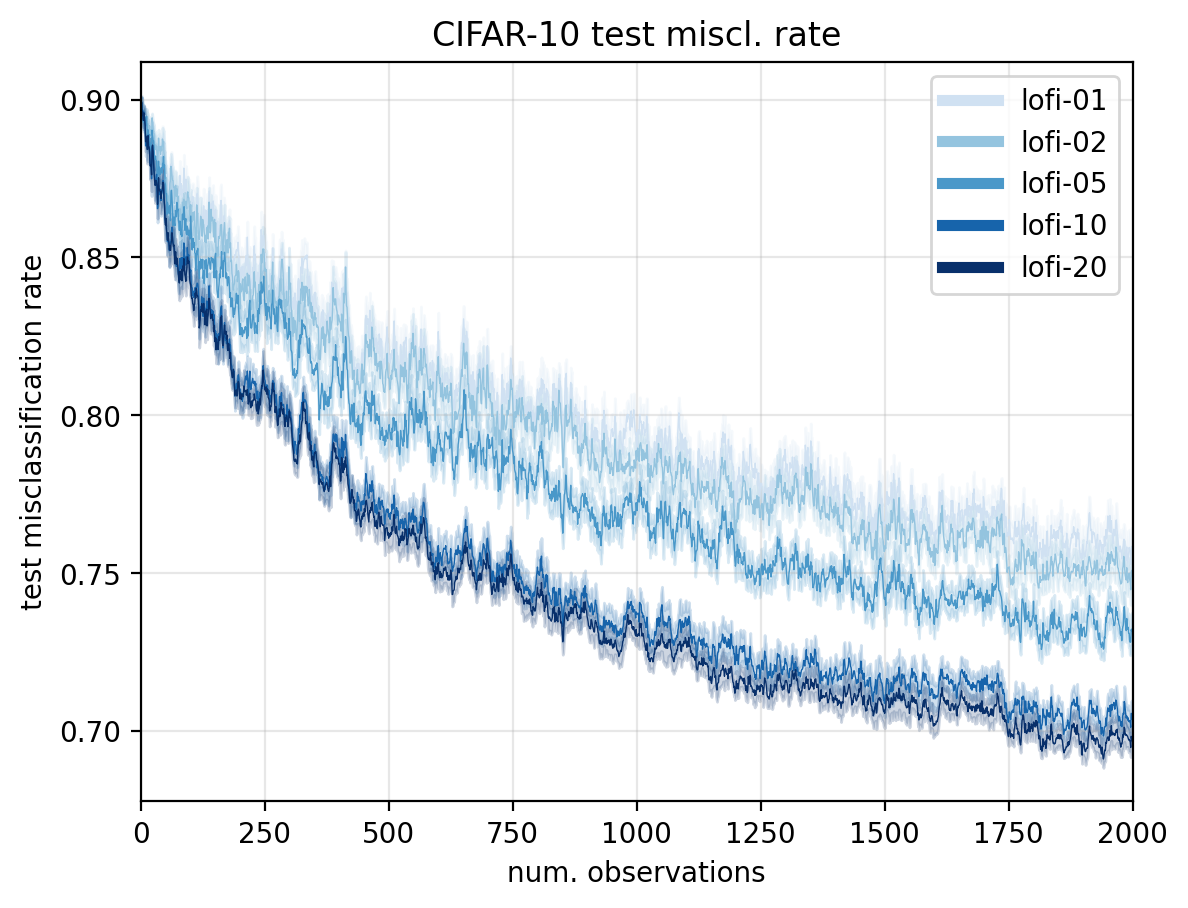

In [24]:
# Misclassification rate
fig, ax = plt.subplots()
for key, val in lofi_miscl_cifar10_mlp.items():
    mean, std = val['mean'], val['std']
    label, color, ls = methods[key]
    ax.plot(mean, label=label, c=color, linewidth=0.5, linestyle=ls)
    ax.fill_between(
        jnp.arange(mean.shape[0]),
        mean - std / jnp.sqrt(n_iter),
        mean + std / jnp.sqrt(n_iter),
        alpha=0.2,
        color=color
    )
ax.set_xlabel('num. observations')
ax.set_ylabel('test misclassification rate')
ax.set_xlim(0, 2000)
# ax.set_ylim(0.2, 0.6)
ax.grid(alpha=0.3)
ax.set_title('CIFAR-10 test miscl. rate')
leg = ax.legend()
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4.0)

fig.savefig(Path(path_cifar10_mlp, 'cifar10-mlp-clf-test-miscl_lofi.pdf'), bbox_inches='tight')

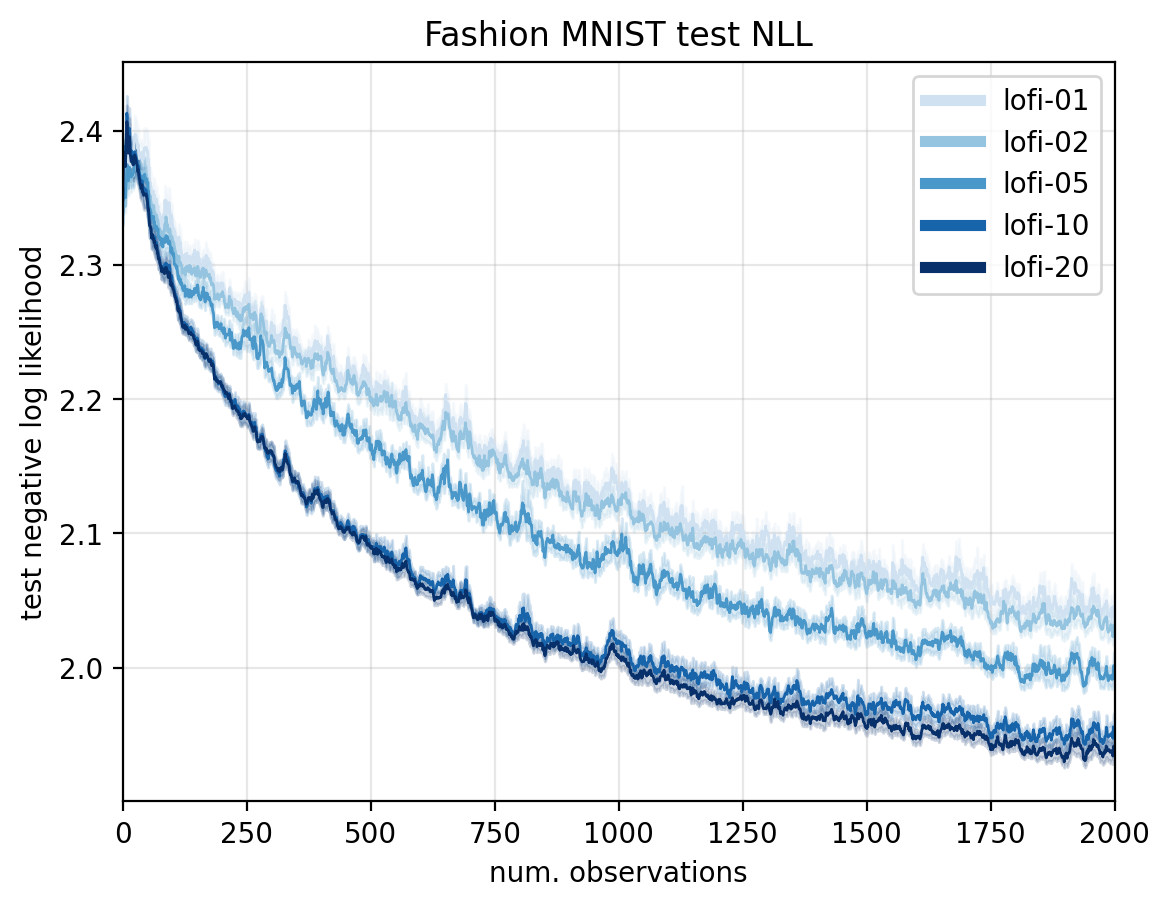

In [25]:
# Negative log-likelihood
fig, ax = plt.subplots()
for key, val in lofi_nll_cifar10_mlp.items():
    mean, std = val['mean'], val['std']
    label, color, ls = methods[key]
    ax.plot(mean, label=label, c=color, linewidth=1.0, linestyle=ls)
    ax.fill_between(
        jnp.arange(mean.shape[0]),
        mean - std / jnp.sqrt(n_iter),
        mean + std / jnp.sqrt(n_iter),
        alpha=0.2,
        color=color
    )
ax.set_xlabel('num. observations')
ax.set_ylabel('test negative log likelihood')
ax.set_xlim(0, 2000)
ax.grid(alpha=0.3)
ax.set_title('Fashion MNIST test NLL')
leg = ax.legend()
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4.0)

fig.savefig(Path(path_cifar10_mlp, 'fmnist-mlp-clf-test-nll_lofi.pdf'), bbox_inches='tight')

# Permuted CIFAR-10

In [ ]:
# Set environmental va/run_regression_experiments.pyriables
%env REBAYES_OUTPUT=./permuted/cifar10/mlp/nll
%env REBAYES_CONFIG=./configs/

# Run the script
# To tune the hyperparameters:
%run run_classification_experiments.py --dataset cifar10 \
    --n_explore 10 --n_exploit 15 --n_iter 20 --problem permuted

In [27]:
path_cifar10_permuted_mlp = Path(Path.cwd(), "permuted", "cifar10", "mlp", "nll")

agents_cifar10_mlp = (
    *[f"sgd-rb-{rank}" for rank in [1, 10,]],
    *[f"adam-rb-{rank}" for rank in [10,]],
    "fdekf", "vdekf",
    *[f"lofi-{rank}" for rank in [1, 10,]],
)

results_miscl_cifar10_permuted_mlp, results_nll_cifar10_permuted_mlp = {}, {}

for method in agents_cifar10_mlp:
    with open(Path(path_cifar10_permuted_mlp, f'{method}.pkl'), "rb") as f:
        curr_result = pickle.load(f)
    results_miscl_cifar10_permuted_mlp[method] = {
        "mean": jnp.mean(curr_result["miscl"]["current"], axis=0),
        "std": jnp.std(curr_result["miscl"]["current"], axis=0),
    }
    results_nll_cifar10_permuted_mlp[method] = {
        "mean": jnp.mean(curr_result["nll"]["current"], axis=0),
        "std": jnp.std(curr_result["nll"]["current"], axis=0),
    }

In [28]:
def apply_convolve(x, kernel_size=10):
    left_pad = jnp.full(kernel_size // 2, x[0])
    right_pad = jnp.full(kernel_size // 2, x[-1])
    padded_data = jnp.concatenate([left_pad, x, right_pad])
    kernel = jnp.ones((kernel_size,)) / kernel_size
    smoothed = jnp.convolve(padded_data, kernel, mode='same')
    smoothed = smoothed[kernel_size//2:-kernel_size // 2]
    return smoothed

In [30]:
n_tasks, ntrain_per_task = 10, 300
boundaries_lg = [i for i in range(ntrain_per_task, (ntrain_per_task*n_tasks)+1, ntrain_per_task)]

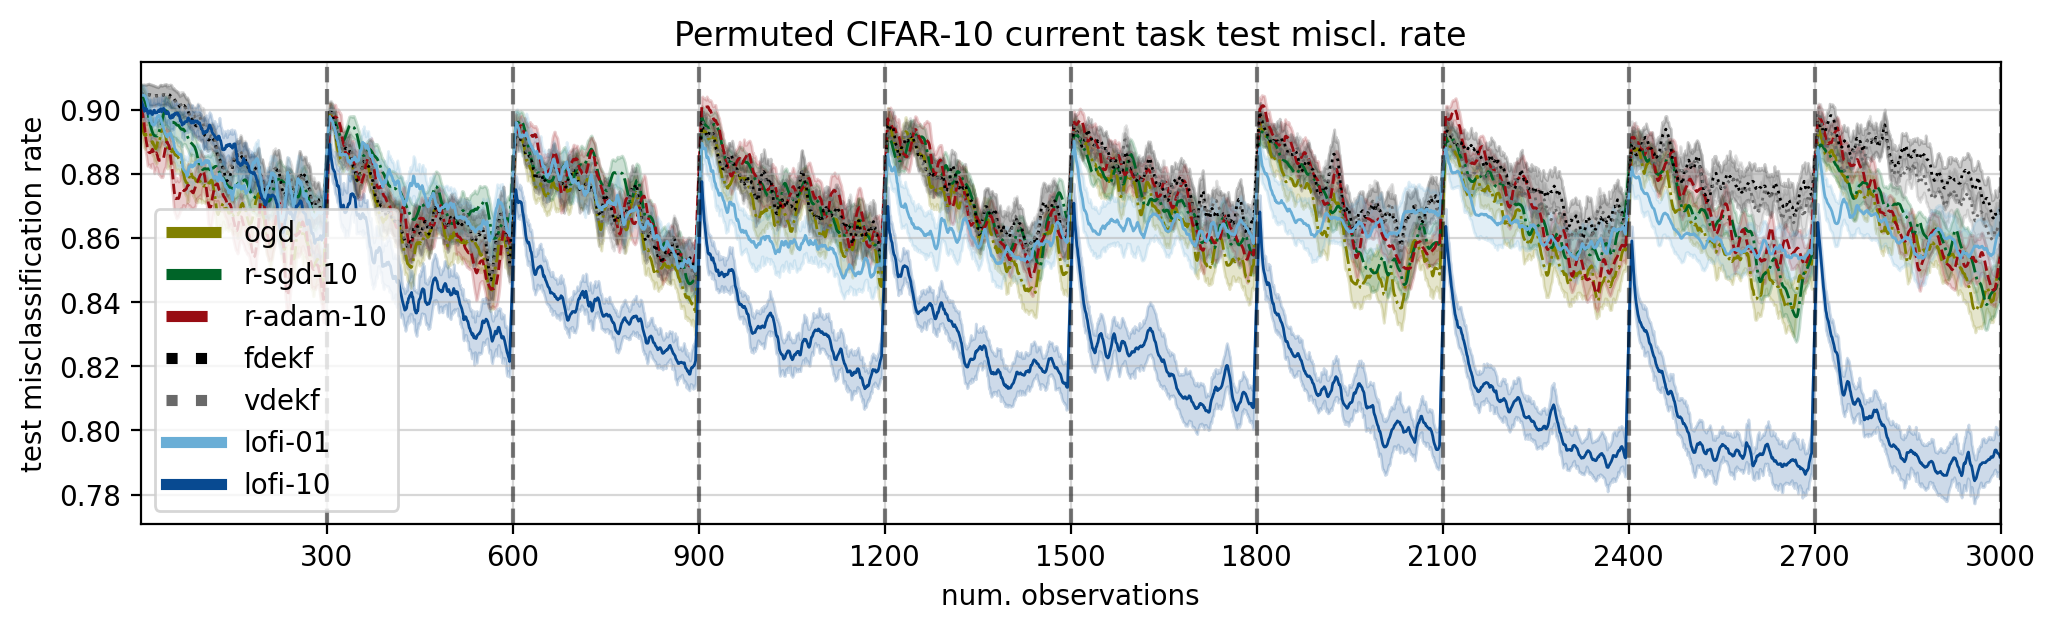

In [35]:
fig, ax = plt.subplots(figsize=(12, 3))
for key, val in results_miscl_cifar10_permuted_mlp.items():
    mean, std = apply_convolve(val['mean']), val['std']
    if key == 'offline_sgd':
        ax.axhline(y=val, color = 'gray', linestyle = '--', label=methods[key]);
    else:
        label, color, ls = methods[key]
        ax.plot(mean, label=label, c=color, linewidth=1.0, linestyle=ls)
        ax.fill_between(
            jnp.arange(mean.shape[0]),
            mean - std / jnp.sqrt(n_iter),
            mean + std / jnp.sqrt(n_iter),
            alpha=0.2,
            color=color,
        )
# Task boundaries
for b in boundaries_lg:
    ax.axvline(x=b, color='k', linestyle='--', alpha=0.5)
ax.set_xticks(boundaries_lg)
ax.set_xlabel('num. observations')
ax.set_ylabel('test misclassification rate');
ax.set_xlim(0, 3_000)
# ax.set_ylim(0.25, 0.8)
ax.set_title(f'Permuted CIFAR-10 current task test miscl. rate')
ax.grid(alpha=0.5)
leg = ax.legend()
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4.0)
fig.savefig(Path(path_cifar10_permuted_mlp, 'nonstationary-cifar10-clf-curr-miscl.pdf'), bbox_inches='tight')

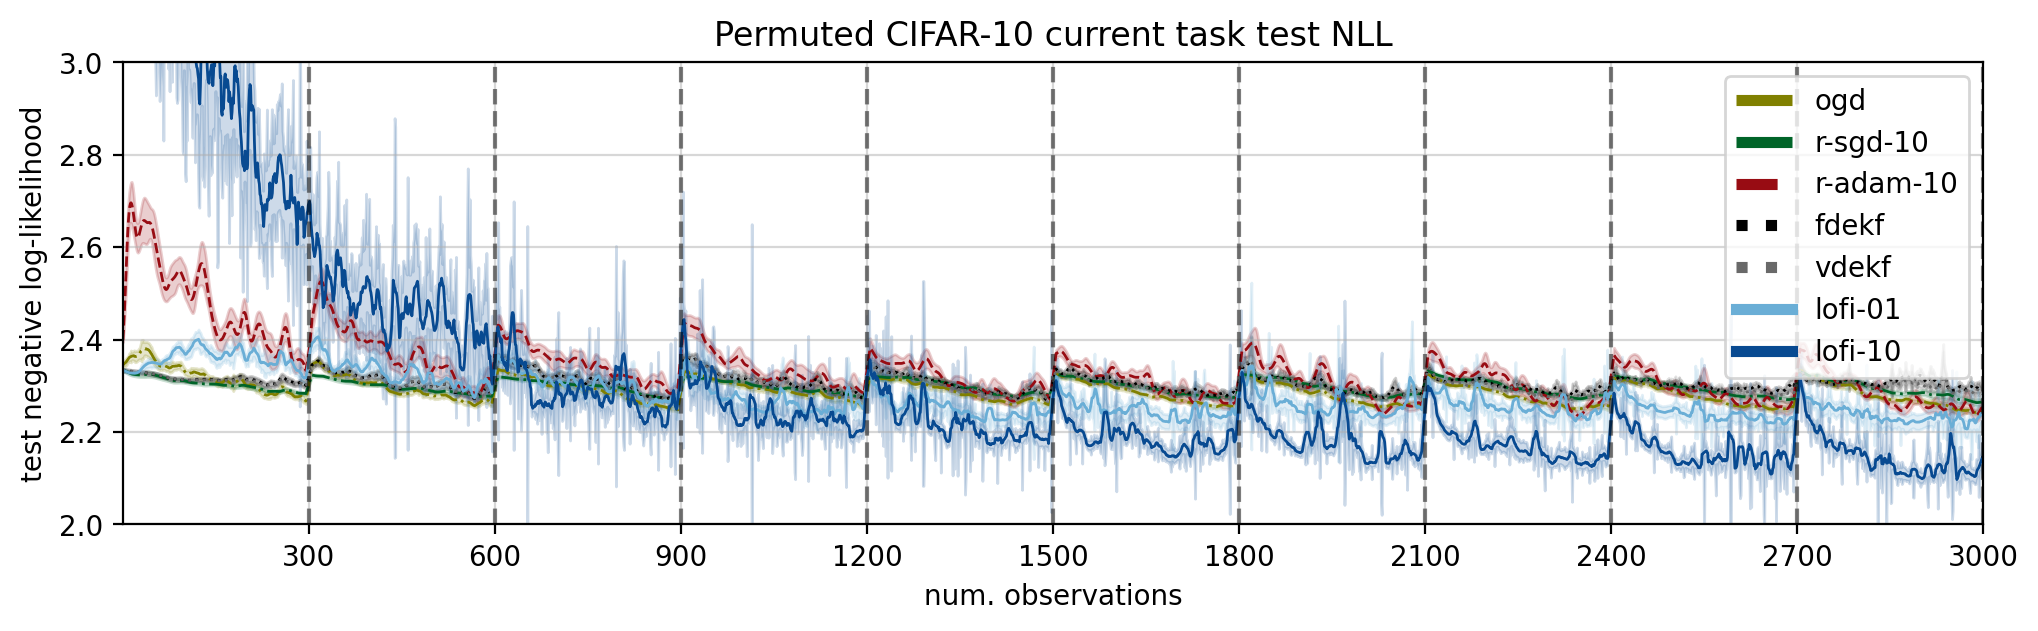

In [38]:
fig, ax = plt.subplots(figsize=(12, 3))
for key, val in results_nll_cifar10_permuted_mlp.items():
    mean, std = apply_convolve(val['mean']), val['std']
    if key == 'offline_sgd':
        ax.axhline(y=val, color = 'gray', linestyle = '--', label=methods[key]);
    else:
        label, color, ls = methods[key]
        ax.plot(mean, label=label, c=color, linewidth=1.0, linestyle=ls)
        ax.fill_between(
            jnp.arange(mean.shape[0]),
            mean - std / jnp.sqrt(n_iter),
            mean + std / jnp.sqrt(n_iter),
            alpha=0.2,
            color=color,
        )
# Task boundaries
for b in boundaries_lg:
    ax.axvline(x=b, color='k', linestyle='--', alpha=0.5)
ax.set_xticks(boundaries_lg)
ax.set_xlabel('num. observations')
ax.set_ylabel('test negative log-likelihood');
ax.set_xlim(0, 3_000)
ax.set_ylim(2.0, 3.0)
ax.set_title(f'Permuted CIFAR-10 current task test NLL')
ax.grid(alpha=0.5)
leg = ax.legend(loc=1)
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4.0)
fig.savefig(Path(path_cifar10_permuted_mlp, 'nonstationary-cifar10-clf-curr-nll.pdf'), bbox_inches='tight')